In [1]:

import numpy as np
import pandas as pd
import os
import PIL # install pillow - pip install Pillow
import PIL.Image
import tensorflow as tf
#from tensorflow import keras
import tensorflow_datasets as tfds # need to install this seperately - pip install tensorflow_datasets
import pathlib
from skimage import io
import datetime
import matplotlib.pyplot as plt
import h5py # pip install h5py
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.gridspec as gridspec
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import glob
import os
import shutil
import socket

c:\Users\chaba\OneDrive\Skrivebord\MAS512_local\python_venvs\MAS512_G_2024_AUTUMN\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# copy .csv files from one location to other
# use only once when you need to add new class

In [2]:
# copy .csv files from one location to other
#use only once when you need to add new class


# src_folder = r"C:\Users\ajitj\OneDrive - Universitetet i Agder\PhD_Research\Paper_Writing\Textile Sorting\Data_textile_NIRSCAN\ML_textile_classification_timeseries\Data_NIRSCAN_CSV\polyester-000011\polyester-000011"
# dst_folder = r"C:\Users\ajitj\OneDrive - Universitetet i Agder\PhD_Research\Paper_Writing\Textile Sorting\Data_textile_NIRSCAN\ML_textile_classification_timeseries\data_ml\polyester"

# # Search files with .txt extension in source directory
# pattern = "\*.csv"
# files = glob.glob(src_folder + pattern)

# # move the files with txt extension
# for file in files:
#     # extract file name form file path
#     file_name = os.path.basename(file)
#     shutil.move(file, dst_folder + file_name)
#     #print('Moved:', file)

# Use this to generate .csv file for ml. Use only once to generate data_cotton_wool_polyester.csv

In [3]:
#run this cell to generate a .csv file to be used for ml

def read_data(path):
    appended_data = []
    df = [pd.read_csv(filename,header=21) for filename in glob.glob(path)] 
    peak_abs=np.zeros((np.shape(df)[0]))
    for file in range(np.shape(df)[0]):
        #df[file][['wavelength','absorbance', 'reference', 'sample_signal']]=df[file]['data'].str.split(expand=True)
        df[file]['wavelength'] = pd.to_numeric(df[file]['Wavelength (nm)'], errors='coerce')
        df[file]['absorbance'] = pd.to_numeric(df[file]['Absorbance (AU)'], errors='coerce')
        df[file]['absorbance']=df[file]['absorbance']/np.max(df[file]['absorbance'])
         # remove data col, as not needed
        df[file]=df[file].drop(['wavelength', 'Absorbance (AU)', 'Reference Signal (unitless)', 'Sample Signal (unitless)', 'Wavelength (nm)'], axis=1)
        #appended_data.append(df[file]) #appends all values in col
        appended_data.append(df[file].T) #228x1 appends each acq in row -- 900 x 228x1
        
        #peak_abs[file]=df[file]['wavelength'][np.argmax(df[file]['absorbance'])]
    appended_data = pd.concat(appended_data) # all 900 acquisition appended together
    #appended_data_coton.to_excel('appended.xlsx') # write to csv    
    return appended_data, peak_abs


# def read_data(path):
#     appended_data=[]
#     for file in range(np.shape(df)[0]):
#         df[file] = pd.DataFrame(df[file])
#         #df_cotton[file]=df_cotton[file].drop(['wavelength'], axis=1)
#         appended_data.append(df[file]) #228x1
#     appended_data = pd.concat(appended_data) # all 900 acquisition appended together
#     appended_data.to_csv('df_cotton.csv', index=False)

#cotton
path_cotton=r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\cotton\**\*.csv' # path of file to read
appended_data_cotton, peak_abs_cotton = read_data(path_cotton) 
class_cotton=np.zeros(len(appended_data_cotton)).astype(int)
appended_data_cotton.insert(np.shape(appended_data_cotton)[1], "class", class_cotton)

#wool
path_wool=r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\wool\**\*.csv'
appended_data_wool, peak_abs_wool =read_data(path_wool) # read file 1000x227x4
class_wool=np.ones(len(appended_data_wool)).astype(int)
appended_data_wool.insert(np.shape(appended_data_wool)[1], "class", class_wool)

#polyester
path_polyester=r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\polyester\**\*.csv'
appended_data_polyester, peak_abs_polyester =read_data(path_polyester) # read file 1000x227x4
class_polyester=np.ones(len(appended_data_polyester)).astype(int) * 2
appended_data_polyester.insert(np.shape(appended_data_polyester)[1], "class", class_polyester)

#check
print("Cotton data : \n {}".format (appended_data_cotton.head()))
print("Wool data : \n {}".format (appended_data_wool.head()))
print("Polyester data : \n {}".format (appended_data_polyester.head()))

#concatenate data frames
data = [appended_data_cotton, appended_data_wool, appended_data_polyester]
data=pd.concat(data) # contains both cottorn and wool with class 0 and 1

print("data-head : \n {}".format (data.head()))
print("data-tail : \n {}".format (data.tail()))

#save to csv
data.to_csv(r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\data_cotton_wool_polyester.csv', index=False)  # only use when you want to add new class

#check
data['class'].value_counts()



Cotton data : 
                    0         1         2         3         4         5  \
absorbance -0.032214 -0.007049 -0.001102 -0.000654 -0.008188 -0.012234   
absorbance -0.031801  0.001236  0.007400  0.005055 -0.003947 -0.004986   
absorbance -0.025959  0.004670  0.002298  0.011410  0.001458 -0.006218   
absorbance -0.026155  0.001027  0.006856  0.003588 -0.004479 -0.009514   
absorbance -0.034190 -0.003693 -0.006235 -0.003916 -0.014561 -0.015821   

                   6         7         8         9  ...       219       220  \
absorbance -0.023874 -0.011937 -0.007605 -0.002166  ...  0.395435  0.395343   
absorbance -0.012545 -0.009262 -0.003596 -0.001151  ...  0.384945  0.385709   
absorbance -0.008979 -0.002654  0.001702  0.003085  ...  0.383040  0.376949   
absorbance -0.013432 -0.008909  0.001362 -0.001913  ...  0.398348  0.387466   
absorbance -0.016435 -0.017141 -0.007870 -0.003992  ...  0.379072  0.376525   

                 221       222       223       224       225    

class
0    1000
1    1000
2    1000
Name: count, dtype: int64

# Use this code to load data_cotton_wool_polyester.csv

In [4]:
data = pd.read_csv(r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\data_cotton_wool_polyester.csv')
#read cotton file, to extract wavelength value. This is same for all acq
path_c=r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\cotton\**\*.csv' # path of file to read
files = glob.glob(path_c)
data_c = pd.concat([pd.read_csv(file, header=21) for file in files], ignore_index=True)
wavelength = data_c['Wavelength (nm)']
wavelength = np.around(wavelength) #truncate to 1 dec place
wavelength = wavelength.to_numpy()


In [5]:
wavelength[-1]

1701.0

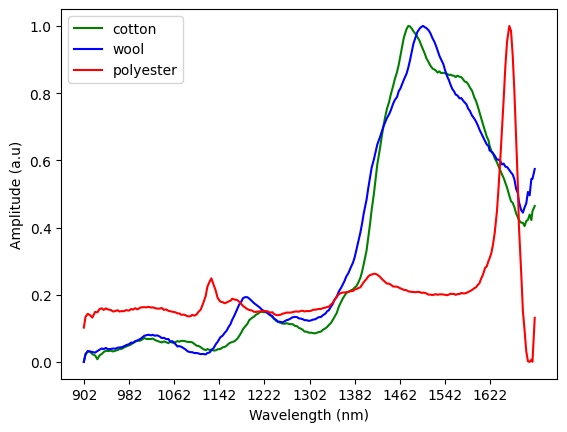

In [6]:

cotton_portion=data[0:int(np.shape(data)[0]/3)] #900x229; 900 data samples (acq), 0:227 data, 228 label data frame; data --1800x229
wool_portion=data[int(np.shape(data)[0]/3):2*int(np.shape(data)[0]/3)]
polyester_portion=data[2*int(np.shape(data)[0]/3)::]

#normalize spectral data
cp=cotton_portion.iloc[0][0:228]
wp=wool_portion.iloc[0][0:228]
pp=polyester_portion.iloc[0][0:228]

cp_n=(cp-np.min(cp))/(np.max(cp)-np.min(cp))
wp_n=(wp-np.min(wp))/(np.max(wp)-np.min(wp))
pp_n=(pp-np.min(pp))/(np.max(pp)-np.min(pp))

plt.figure(1)
#plt.title('Data')
plt.plot(wavelength[:228], cp_n, 'g', label='cotton') #cotton_portion.iloc[0][0:228]
plt.plot(wavelength[:228], wp_n, 'b', label='wool')
plt.plot(wavelength[:228], pp_n, 'r', label='polyester')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Amplitude (a.u)')
# Change x-axis tick spacing
plt.xticks(np.arange(wavelength[0], wavelength[227], step=80))  # ticks at 0, 2, 4, ..., 10
plt.legend()
plt.show()


In [7]:
cp=cotton_portion.iloc[0][0:228]
cp_n=(cp-np.mean(cp))/np.std(cp)
cp_n

0     -1.038446
1     -0.965672
2     -0.948475
3     -0.947178
4     -0.968968
         ...   
223    0.224516
224    0.270548
225    0.221626
226    0.300617
227    0.346696
Name: 0, Length: 228, dtype: float64

In [8]:
# def read_data(path):
#     appended_data = []
#     df = [pd.read_csv(filename,header=21) for filename in glob.glob(path)] 
#     peak_abs=np.zeros((np.shape(df)[0]))
#     for file in range(np.shape(df)[0]):
#         #df[file][['wavelength','absorbance', 'reference', 'sample_signal']]=df[file]['data'].str.split(expand=True)
#         df[file]['wavelength'] = pd.to_numeric(df[file]['Wavelength (nm)'], errors='coerce')
#         df[file]['absorbance'] = pd.to_numeric(df[file]['Absorbance (AU)'], errors='coerce')
#         df[file]['absorbance']=df[file]['absorbance']/np.max(df[file]['absorbance'])
#          # remove data col, as not needed
#         df[file]=df[file].drop(['Absorbance (AU)', 'Reference Signal (unitless)', 'Sample Signal (unitless)', 'Wavelength (nm)'], axis=1)
#         appended_data.append(df[file])
#         peak_abs[file]=df[file]['wavelength'][np.argmax(df[file]['absorbance'])]
#     appended_data = pd.concat(appended_data) # all 900 acquisition appended together
#     #appended_data_coton.to_excel('appended.xlsx') # write to csv    
#     return df, appended_data, peak_abs



# def read_data(path):
#     append_files=[]
#     for file in range(np.shape(df_cotton)[0]):
#         df_cotton[file] = pd.DataFrame(df_cotton[file])
#         #df_cotton[file]=df_cotton[file].drop(['wavelength'], axis=1)
#         append_files_cotton.append(df_cotton[file].T) #228x1
#     append_files_cotton = pd.concat(append_files_cotton) # all 900 acquisition appended together
#     append_files_cotton.to_csv('df_cotton.csv', index=False)




# path_cotton=r'C:\Users\ajitj\OneDrive - Universitetet i Agder\PhD_Research\Paper_Writing\Textile Sorting\Data_textile_NIRSCAN\ML_textile_classification_timeseries\train\cotton\*.csv' # path of file to read
# df_cotton, appended_data_cotton, peak_abs_cotton =read_data(path_cotton) # read file 1000x227x4
# class_cotton=np.zeros(len(appended_data_cotton)).astype(int)
# appended_data_cotton.insert(2, "class", class_cotton)

In [9]:
# np.shape(df_cotton), np.shape(appended_data_cotton), 

# append_files_cotton=[]
# #convert df_cotton from list to pd dataframe, save it as csv
# for file in range(np.shape(df_cotton)[0]):
#     df_cotton[file] = pd.DataFrame(df_cotton[file])
#     #df_cotton[file]=df_cotton[file].drop(['wavelength'], axis=1)
#     append_files_cotton.append(df_cotton[file].T) #228x1
# append_files_cotton = pd.concat(append_files_cotton) # all 900 acquisition appended together
# append_files_cotton.to_csv('df_cotton.csv', index=False)

 # Use this to read csv files and do ml. Use this ONLY when the data is  saved as .csv

In [10]:
#use this to read csv files and onwards
data = pd.read_csv(r'C:\Users\chaba\OneDrive\Skrivebord\MAS513_local\Textile_sorting\Project\textile_sorting_NIRSCAN_\samples\data_cotton_wool_polyester.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,class
0,-0.032214,-0.007049,-0.001102,-0.000654,-0.008188,-0.012234,-0.023874,-0.011937,-0.007605,-0.002166,...,0.395435,0.395343,0.384994,0.400474,0.404514,0.420432,0.403515,0.430830,0.446764,0
1,-0.031801,0.001236,0.007400,0.005055,-0.003947,-0.004986,-0.012545,-0.009262,-0.003596,-0.001151,...,0.384945,0.385709,0.380950,0.395877,0.394159,0.409218,0.390902,0.420893,0.425142,0
2,-0.025959,0.004670,0.002298,0.011410,0.001458,-0.006218,-0.008979,-0.002654,0.001702,0.003085,...,0.383040,0.376949,0.388710,0.399407,0.385891,0.400833,0.430223,0.404323,0.440580,0
3,-0.026155,0.001027,0.006856,0.003588,-0.004479,-0.009514,-0.013432,-0.008909,0.001362,-0.001913,...,0.398348,0.387466,0.376672,0.386040,0.408835,0.383884,0.410115,0.420786,0.421234,0
4,-0.034190,-0.003693,-0.006235,-0.003916,-0.014561,-0.015821,-0.016435,-0.017141,-0.007870,-0.003992,...,0.379072,0.376525,0.377253,0.395654,0.380191,0.374733,0.390266,0.373641,0.417048,0


In [11]:
# train test data set

# train_df, val_df = train_test_split(data, test_size=0.20)
# train_df, test_df = train_test_split(train_df, test_size=0.1)

# #training, val and test data size
# print ("Train shape: {} \n Val shape: {} \n Test shape: {} \n" .format(np.shape(train_df), np.shape(val_df), np.shape(test_df))) 
# #np.array( [np.shape(train_df)[0], np.shape(val_df)[0], np.shape(val_df)[0] ]) /np.array([np.shape(data)[0]])
# # train, val, test - 70, 20, 10

# #save to csv
# #data.to_csv('data_cotton_wool.csv', index=False)  

# #check
# data['class'].value_counts()

In [12]:
# train, test split 

y = data['class']
x = data.drop(columns=['class'])
#x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20,random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=40)


print("Train: \n {}\n".format(y_train.value_counts()))
print("Val: \n {} \n".format(y_val.value_counts()))
print("Test: \n {} \n".format(y_test.value_counts()))

print("Train: \n {} {}\n".format(np.shape(x_train), np.shape(y_train)))
print("Val: \n {} {}\n".format(np.shape(x_val), np.shape(y_val)))
print("Test: \n {} {}\n".format(np.shape(x_test), np.shape(y_test)))

# Train: (1440, 228) (1440,)

#Val: (360, 228) (360,)


Train: 
 class
2    730
1    720
0    710
Name: count, dtype: int64

Val: 
 class
0    217
1    197
2    186
Name: count, dtype: int64 

Test: 
 class
2    84
1    83
0    73
Name: count, dtype: int64 

Train: 
 (2160, 228) (2160,)

Val: 
 (600, 228) (600,)

Test: 
 (240, 228) (240,)



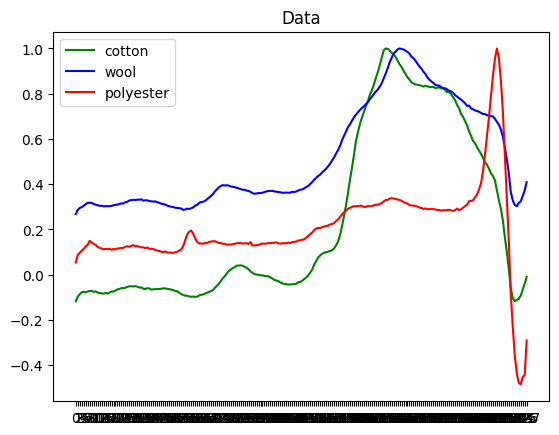

In [13]:
#check few samples

# find where the label is 0 (cotton) and 1 (wool) in training / val  data
y_train_1=np.argwhere(y_train==1) # index where y_train=1 wool label
y_train_0=np.argwhere(y_train==0) # index where y_train=0 cotton label
y_train_2=np.argwhere(y_train==2) # index where y_train=0 cotton label

y_val_1=np.argwhere(y_val==1) # index where y_val=1 wool label
y_val_0=np.argwhere(y_val==0) # index where y_val=0 cotton label
y_val_2=np.argwhere(y_val==2) # index where y_val=0 cotton label

plt.figure(1)
plt.title('Data')
plt.plot(x_train.iloc[y_train_0[0,0]],'g', label='cotton') #values of absorbance in training data whose label is 0 - cotton
plt.plot(x_train.iloc[y_train_1[0,0]],'b', label='wool') #values of absorbance in training data whose label is 1 - wool
plt.plot(x_train.iloc[y_train_2[0,0]],'r', label='polyester') #values of absorbance in training data whose label is 1 - wool
plt.legend()
plt.show()

In [14]:
METRICS = [
      tf.keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      tf.keras.metrics.MeanSquaredError(name='Brier score'),
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS):
  
  # model1 = tf.keras.Sequential([
  #     tf.keras.layers.Dense(
  #         16, activation='relu',
  #         input_shape=(x_train.shape[-1],)),
  #     tf.keras.layers.Dropout(0.5),
  #     tf.keras.layers.Dense(1, activation='sigmoid'),
  # ])

  model=tf.keras.Sequential([
    
  #tf.keras.layers.experimental.preprocessing.Rescaling(scale=1 / 127.5, input_shape=(n_row, n_col, 3), offset=-1),
  #tf.keras.layers.Dense(228, activation='relu',input_shape=(x_train.shape[-1],)),
  tf.keras.layers.Conv1D(8, kernel_size=8, input_shape=(x_train.shape[-1],1), strides=1,  activation='relu'),  
  tf.keras.layers.MaxPooling1D(pool_size=2),
  tf.keras.layers.Conv1D(16, 8, padding="same", activation="relu"),
  tf.keras.layers.MaxPooling1D(pool_size=2),
  
  #tf.keras.layers.Conv1D(32, 8, padding="same", activation="relu"),  !!!!!!
  
  #tf.keras.layers.Conv1D(64, 3, padding="same", activation="relu"),
  #tf.keras.layers.MaxPooling1D(pool_size=2),
  #tf.keras.layers.Conv1D(64, 3, padding="same", activation="relu"),
  #tf.keras.layers.MaxPooling1D(pool_size=2),

  #tf.keras.layers.Conv1D(64, 3, activity_regularizer=tf.keras.regularizers.L2(0.01),padding="same", activation="relu"),
  tf.keras.layers.MaxPooling1D(pool_size=2),

  tf.keras.layers.Flatten(),

  # tf.keras.layers.Dense(64, 
  # activity_regularizer=tf.keras.regularizers.L2(0.01),
  # activation='relu'),

  tf.keras.layers.Dense(
     32, 
      activity_regularizer=tf.keras.regularizers.L2(0.01),
      activation='relu'),
  tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.Dense(1, activation='sigmoid'),
  tf.keras.layers.Dense(3, activation='softmax'),
    ])

  model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss=tf.keras.losses.BinaryCrossentropy(),
        #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # use false when we have softmax at last layer
        metrics=metrics)

  return model

EPOCHS = 100 #50
BATCH_SIZE = 32

# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_prc', 
#     verbose=1,
#     patience=10,
#     mode='max',
#     restore_best_weights=True)

model = make_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 221, 8)            72        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 110, 8)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 110, 16)           1040      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 55, 16)           0         
 1D)                                                             
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 27, 16)           0         
 1D)                                                             
                                                        

In [15]:
log_path=r'C:\Users\devTe\Desktop\ML\log'
#ap_name=datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#model_save_path=os.path.join(log_path,  ap_name + '.' + 'h5')

#log_dir = log_path + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(
       #log_dir=log_dir, 
       histogram_freq=1,
       write_graph=False,
       write_images=False, #write model weights to visualize as image in TensorBoard.
       write_steps_per_second=False,
       update_freq='epoch', #'batch'
       profile_batch=0,
       embeddings_freq=0,
       embeddings_metadata=None,
       #**kwargs
)

#convert to one hot encoding

enc = OneHotEncoder()
#x_train_ohe = enc.fit_transform(np.asarray(x_train).astype('float32').reshape((-1,1))).toarray()
#x_val_ohe = enc.fit_transform(np.asarray(x_val).astype('float32').reshape((-1,1))).toarray() 
y_train_ohe = enc.fit_transform(np.asarray(y_train).astype('float32').reshape((-1,1))).toarray() 
y_val_ohe = enc.fit_transform(np.asarray(y_val).astype('float32').reshape((-1,1))).toarray()
y_test_ohe = enc.fit_transform(np.asarray(y_test).astype('float32').reshape((-1,1))).toarray()


history=model.fit(
 x_train,
 y_train_ohe,
 validation_data=(x_val, y_val_ohe),
 epochs=EPOCHS,
 verbose=1,
 callbacks=[tensorboard_callback]
)

Epoch 1/100
68/68 [==============================] - 2s 16ms/step - loss: 0.4968 - cross entropy: 0.4422 - Brier score: 0.0980 - tp: 1309.0000 - fp: 12.0000 - tn: 4308.0000 - fn: 851.0000 - accuracy: 0.8668 - precision: 0.9909 - recall: 0.6060 - auc: 0.9792 - prc: 0.9626 - val_loss: 0.3257 - val_cross entropy: 0.2054 - val_Brier score: 0.0097 - val_tp: 596.0000 - val_fp: 3.0000 - val_tn: 1197.0000 - val_fn: 4.0000 - val_accuracy: 0.9961 - val_precision: 0.9950 - val_recall: 0.9933 - val_auc: 0.9953 - val_prc: 0.9879
Epoch 2/100
68/68 [==============================] - 1s 8ms/step - loss: 0.2968 - cross entropy: 0.1833 - Brier score: 0.0092 - tp: 2144.0000 - fp: 8.0000 - tn: 4312.0000 - fn: 16.0000 - accuracy: 0.9963 - precision: 0.9963 - recall: 0.9926 - auc: 0.9978 - prc: 0.9962 - val_loss: 0.2527 - val_cross entropy: 0.1434 - val_Brier score: 0.0039 - val_tp: 597.0000 - val_fp: 3.0000 - val_tn: 1197.0000 - val_fn: 3.0000 - val_accuracy: 0.9967 - val_precision: 0.9950 - val_recall: 0.

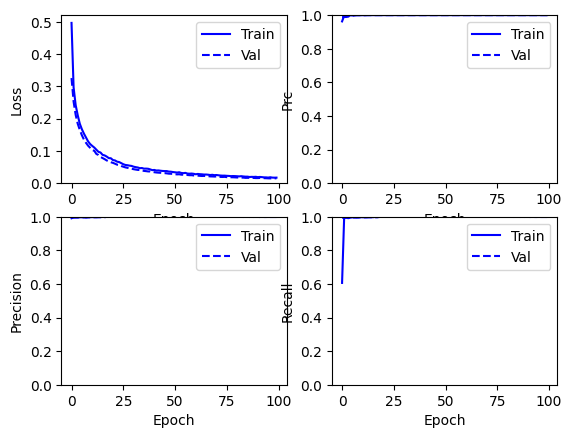

In [16]:
#plot training history

def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  colors=['b', 'g']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

plot_metrics(history)

8/8 [==============================] - 0s 2ms/step
loss :  0.014797237701714039
cross entropy :  0.004053411539644003
Brier score :  0.0009731755708344281
tp :  599.0
fp :  1.0
tn :  1199.0
fn :  1.0
accuracy :  0.9988889098167419
precision :  0.9983333349227905
recall :  0.9983333349227905
auc :  0.9999986290931702
prc :  0.9999971985816956

Legitimate Transactions Detected (True Negatives):  73
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  83
Total Fraudulent Transactions:  83
Classification report : 
               precision    recall  f1-score   support

      Cotton       1.00      1.00      1.00        73
        Wool       1.00      1.00      1.00        83
   Polyester       1.00      1.00      1.00        84

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00     

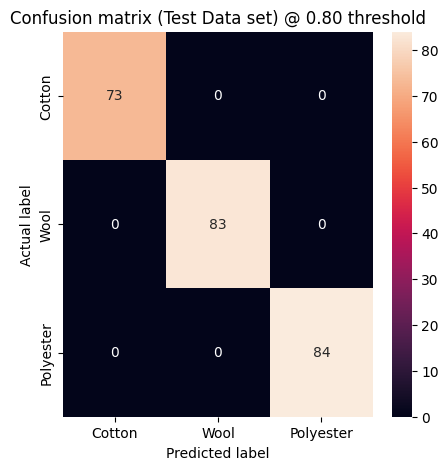

In [17]:
#confusion matrix


test_predictions_baseline = model.predict(x_test, batch_size=BATCH_SIZE)
class_names=['Cotton', 'Wool', 'Polyester']
threshold=0.8

def plot_cm(labels, predictions, class_names, threshold):
  predictions > threshold
  np.argmax(predictions, axis=1)
  predicted_label=np.argmax(predictions, axis=1)
  
  cm = confusion_matrix(labels,predicted_label ) #predictions > threshold
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalized cm
  
  plt.figure(figsize=(5,5))
  #sns.heatmap(cm, annot=True, fmt="d")
  #plt.subplot(2,1,1)
  #sns.heatmap(cmn, annot=True, fmt=".2f", xticklabels=class_names, yticklabels=class_names) 
 
  # plt.subplot(2,1,2)
  sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
  
  plt.title('Confusion matrix (Test Data set) @ {:.2f} threshold'.format(threshold))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

  print('Classification report : \n',classification_report(y_test, predicted_label, target_names=class_names)) #true_label, predicted_label

baseline_results = model.evaluate(x_val, y_val_ohe,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline, class_names, threshold)



In [19]:
#np.shape(x_test)
x_test_arr=np.array(x_test)
np.shape(x_test_arr)
test_predictions_baseline1 = model.predict(x_test_arr[np.random.randint(len(x_test_arr))].reshape(1, -1))
print(test_predictions_baseline1)
aa=np.argmax(test_predictions_baseline1)

# Define the server IP and port (use the Ubuntu machine's IP)
SERVER_IP = '192.168.1.20'
SERVER_PORT = 12345

# Create a socket object
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Connect to the server
client_socket.connect((SERVER_IP, SERVER_PORT))

# Send the detection label to the server
client_socket.send(str(aa).encode('utf-8'))
print(f"Sent label: {aa}")

# Close the connection
client_socket.close()


1/1 [==============================] - 0s 18ms/step
[[4.6392147e-06 9.9998987e-01 5.4294064e-06]]
Sent label: 1


'\n# Close the connection\nwhile True:\n    # Predict a random sample from x_test\n    test_predictions_baseline1 = model.predict(x_test_arr[np.random.randint(len(x_test_arr))].reshape(1, -1))\n    print(test_predictions_baseline1)\n    aa = np.argmax(test_predictions_baseline1)\n    print(aa)  # send aa to Ubuntu\n    labels = {0: \'cotton\', 1: \'wool\', 2: \'polyester\'}\n    label = labels.get(aa, "Unknown")\n\n    # Ensure the socket connection is established before sending data\n    if client_socket:\n        # Send the detection label to the server\n        client_socket.send(label.encode(\'utf-8\'))\n        print(f"Sent label: {label}")\n\n        # Receive a response from the server\n        response = client_socket.recv(1024).decode(\'utf-8\')\n        print(f"Server response: {response}")\n    else:\n        print("Socket connection not established.")\n\n    # Optional: Add a delay if needed\n    # time.sleep(1)\n'